In [1]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd

# World Meters
Countries in the world by population (2023)

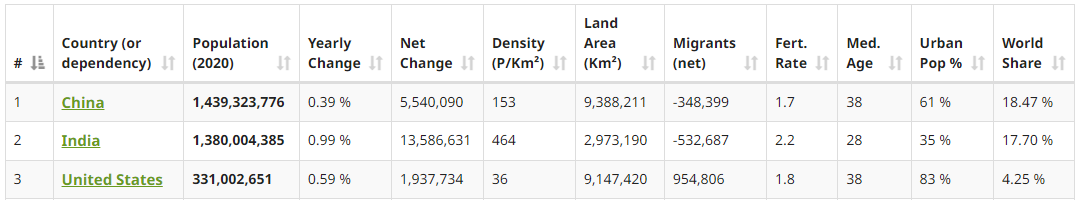

In [2]:
# Getting and the data from the web
link = "https://www.worldometers.info/world-population/population-by-country/"
source = requests.get(link).text
soup = BeautifulSoup(source, 'html')

# Finding the table
table = soup.find('table', id="example2")

# Table header (exclude the '#' column)
table_header = [th.text.strip() \
                   for th in table.thead.tr.find_all('th')] \
                   [1:]

# Opening the csv and writing the table header
csv_file = open('Countries in the world by population (2023).csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(table_header)

# Finding table's rows and writing them to csv
trs = (table.tbody).find_all('tr')
for tr in trs:
  row = [td.text.strip() \
           for td in tr.find_all('td')][1:] #(exclude the '#' column)
  csv_writer.writerow(row)

# Close the csv writing
csv_file.close()

In [6]:
# Top ten results
pd.read_csv('Countries in the world by population (2023).csv').head(10)

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
5,Brazil,"212,559,417",0.72 %,"1,509,890",25,"8,358,140","21,200",1.7,33,88 %,2.73 %
6,Nigeria,"206,139,589",2.58 %,"5,175,990",226,"910,770","-60,000",5.4,18,52 %,2.64 %
7,Bangladesh,"164,689,383",1.01 %,"1,643,222","1,265","130,170","-369,501",2.1,28,39 %,2.11 %
8,Russia,"145,934,462",0.04 %,"62,206",9,"16,376,870","182,456",1.8,40,74 %,1.87 %
9,Mexico,"128,932,753",1.06 %,"1,357,224",66,"1,943,950","-60,000",2.1,29,84 %,1.65 %


# NBA Player Stats
NBA Player Stats 2021-2022

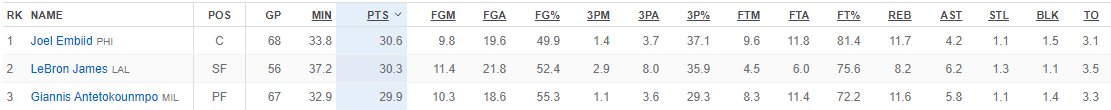

In [4]:
# Getting and the data from the web
link = "https://www.espn.com/nba/stats/player/_/season/2022/seasontype/2"
source = requests.get(link).text
soup = BeautifulSoup(source, 'html')
lim = 25

# Finding the table
tables = soup.find_all('tbody', class_="Table__TBODY")
table1, table2 = tables[0], tables[1]
del tables, soup, source

# First dataframe initiation
df1 = pd.DataFrame(columns = ['Rank', 'Name', 'Team'])

# Scraping the first dataframe
for row in table1.find_all('tr', limit=lim):
    tds = row.find_all('td')

    # The columns
    rank = tds[0].text
    name = tds[1].div.a.text
    team = tds[1].div.span.text
    
    # Appending
    df1 = df1.append(
        {'Rank':rank, 'Name':name, 'Team':team}, ignore_index = True
    )

# Second dataframe initiation
df2 = pd.DataFrame(
    columns = [
        'POS', 'GP', 'MIN', 'PTS', 'FG%','3PM', 
        '3P%', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TO'
        ]
)

# Scraping the second dataframe
for row in table2.find_all('tr', limit=lim):
    tds = row.find_all('td')
        
    # Appending
    df2 = df2.append(
        {'POS' : tds[0].text, 'GP' : tds[1].text, 'MIN' : tds[2].text, 
         'PTS' : tds[3].text, 'FG%' : tds[6].text, '3PM' : tds[7].text, 
         '3P%' : tds[9].text, 'FT%' : tds[12].text, 'REB' : tds[13].text, 
         'AST' : tds[14].text, 'STL' : tds[15].text, 'BLK' : tds[16].text, 
         'TO' : tds[17].text}, ignore_index = True
    )

# Joining df1 and df2
player_df = df1.join(df2)
del df1, df2, table1, table2

# Data types
player_df[['Rank', 'GP']] = player_df[['Rank', 'GP']].astype(int)
cols = ['MIN', 'PTS', 'FG%', '3PM', '3P%', 'FT%', 'REB', 'AST','STL', 'BLK', 'TO']
player_df[cols] = player_df[cols].astype(float)

In [7]:
# Top ten scorers
player_df.head(10)

,Rank,Name,Team,POS,GP,MIN,PTS,FG%,3PM,3P%,FT%,REB,AST,STL,BLK,TO
0,1,Joel Embiid,PHI,C,68,33.8,30.6,49.9,1.4,37.1,81.4,11.7,4.2,1.1,1.5,3.1
1,2,LeBron James,LAL,SF,56,37.2,30.3,52.4,2.9,35.9,75.6,8.2,6.2,1.3,1.1,3.5
2,3,Giannis Antetokounmpo,MIL,PF,67,32.9,29.9,55.3,1.1,29.3,72.2,11.6,5.8,1.1,1.4,3.3
3,4,Kevin Durant,BKN,PF,55,37.2,29.9,51.8,2.1,38.3,91.0,7.4,6.4,0.9,0.9,3.5
4,5,Luka Doncic,DAL,PG,65,35.4,28.4,45.7,3.1,35.3,74.4,9.1,8.7,1.2,0.6,4.5
5,6,Trae Young,ATL,PG,76,34.9,28.4,46.0,3.1,38.2,90.4,3.7,9.7,0.9,0.1,4.0
6,7,DeMar DeRozan,CHI,SF,76,36.1,27.9,50.4,0.7,35.2,87.7,5.2,4.9,0.9,0.3,2.4
7,8,Kyrie Irving,BKN,PG,29,37.7,27.4,46.9,3.4,41.8,91.5,4.4,5.8,1.4,0.6,2.5
8,9,Ja Morant,MEM,PG,57,33.1,27.4,49.3,1.5,34.4,76.1,5.7,6.7,1.2,0.4,3.4
9,10,Nikola Jokic,DEN,C,74,33.5,27.1,58.3,1.3,33.7,81.0,13.8,7.9,1.5,0.9,3.8
